<a href="https://colab.research.google.com/github/sergejhorvat/TensorFlow-in-Practice---Coursera/blob/master/Natural%20Language%20Processing%20in%20TensorFlow/Week4_Exercise_Shakespeare_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

Using TensorFlow backend.


In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

# One hot encoding
label = ku.to_categorical(label, num_classes=total_words)

--2019-12-16 21:10:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-12-16 21:10:35 (157 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [14]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length = max_sequence_len-1)) # Embedding layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))  # An LSTM Layer
model.add(Dropout(rate=0.2)) # Dropout layer
model.add((LSTM(100)))# Another LSTM Layer
model.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers
model.add(Dense(total_words, activation='softmax')) # A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 10, 128)           411008    
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 10, 200)           183200    
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 200)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               120400    
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              103424    
_________________________________________________________________
dense_7 (Dense)              (None, 3211)              3291275   
Total params: 4,109,307
Trainable params: 4,109,307
Non-trainable params: 0
____________________________________________

In [15]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 11s 706us/sample - loss: 6.9432 - accuracy: 0.0207
Epoch 2/100
15462/15462 [==============================] - 7s 444us/sample - loss: 6.4968 - accuracy: 0.0224
Epoch 3/100
15462/15462 [==============================] - 7s 445us/sample - loss: 6.4027 - accuracy: 0.0230
Epoch 4/100
15462/15462 [==============================] - 7s 451us/sample - loss: 6.2812 - accuracy: 0.0303
Epoch 5/100
15462/15462 [==============================] - 7s 462us/sample - loss: 6.1833 - accuracy: 0.0345
Epoch 6/100
15462/15462 [==============================] - 7s 454us/sample - loss: 6.0994 - accuracy: 0.0378
Epoch 7/100
15462/15462 [==============================] - 7s 442us/sample - loss: 6.0205 - accuracy: 0.0391
Epoch 8/100
15462/15462 [==============================] - 7s 444us/sample - loss: 5.9336 - accuracy: 0.0440
Epoch 9/100
15462/15462 [==============================] - 7s 449us/sample - loss: 5.8419 - accuracy: 0.

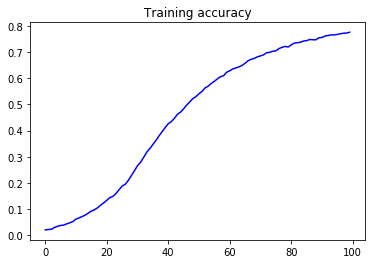

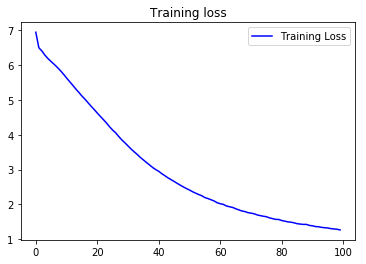

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [17]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope which yet you fears by strife twain near prove thee new ground place green old die thee again well ere live back blushing glory straight bearing die young pride weeds hate faith back blushing stand quite weeds things wrong rare leaves gone new appetite doth appetite new foes commend twain twain bright eyes parts new due on ill care in men friend well prove die life still green new lie die in me now me find me men tell every glory leaves twain twain glory die none ere thence none after 'tis gone great lease rage age hath every fine
